# Simuleren van beweging

Onderstaand is er een stuk code geschreven die een valbeweging beschrijft van een object. Tijdens deze valbeweging is er nog geen sprake van een wrijvingskracht, waardoor het object constant kan accelereren.

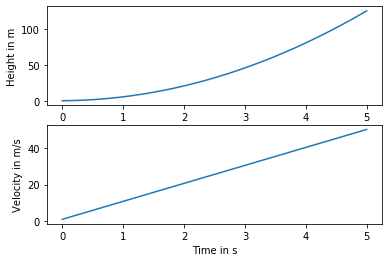

In [1]:
import numpy as np
import matplotlib.pyplot
%matplotlib inline

def forward_euler():
    h=0.1
    g=9.81
    friction = 0.1

    num_steps = 50
    t = np.zeros(num_steps+1)
    x = np.zeros(num_steps+1)
    v = np.zeros(num_steps+1)
    
    v[0] = 1
    
    for step in range(num_steps):
        t[step+1] = t[step] + h
        x[step+1] = x[step] + v[step]*h
        v[step+1] = v[step] + g*h
    return t,x,v

t,x,v = forward_euler()

def plot_me():
    axes_height = matplotlib.pyplot.subplot(211)
    matplotlib.pyplot.plot(t, x)
    axes_velocity = matplotlib.pyplot.subplot(212)
    matplotlib.pyplot.plot(t, v)
    axes_height.set_ylabel('Height in m')
    axes_velocity.set_ylabel('Velocity in m/s')
    axes_velocity.set_xlabel('Time in s')
    matplotlib.pyplot.show()

plot_me()


Aangezien een object tijdens zijn val wel degelijk een bepaalde wrijvingsweerstand ondervindt, moet dit dan ook meegenomen worden in de formule. Dit wordt gedaan door een bepaalde wrijvingscoëfficiënt mee te nemen en deze wrijvingskracht constant te vergelijken met de huidige snelheid. Hierdoor zal het object uiteindelijk met een constante snelheid vallen.

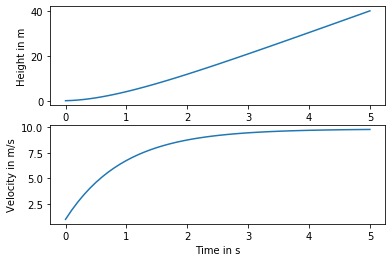

In [2]:
def forward_euler_with_friction():
    h=0.1
    g=9.81
    friction = 0.1

    num_steps = 50
    t = np.zeros(num_steps+1)
    x = np.zeros(num_steps+1)
    v = np.zeros(num_steps+1)
    
    v[0] = 1
    
    for step in range(num_steps):
        t[step+1] = t[step] + h
        x[step+1] = x[step] + v[step]*h
        v[step+1] = v[step] + g*h - friction*v[step]
    return t,x,v

t,x,v = forward_euler_with_friction()

def plot_me():
    axes_height = matplotlib.pyplot.subplot(211)
    matplotlib.pyplot.plot(t, x)
    axes_velocity = matplotlib.pyplot.subplot(212)
    matplotlib.pyplot.plot(t, v)
    axes_height.set_ylabel('Height in m')
    axes_velocity.set_ylabel('Velocity in m/s')
    axes_velocity.set_xlabel('Time in s')
    matplotlib.pyplot.show()

plot_me()

In de onderstaande grafiek wordt een veerbeweging van een object geplot.  
Per tijdsstap wordt de kracht die op het object staat berekend en met die kracht kan de versnelling berekend worden. Met behulp van de versnelling kan de nieuwe snelheid berekend worden die op zijn tijd weer de positie teruggeeft van het object.

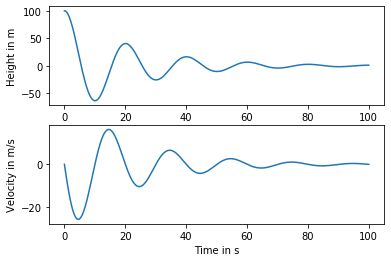

In [3]:
import numpy as np
import matplotlib.pyplot
%matplotlib inline

def forward_euler_with_spring():
    h=0.1
    g=9.81
    m=100
    pos=100
    friction = 0.1

    num_steps = 1000
    t = np.zeros(num_steps+1)
    x = np.zeros(num_steps+1)
    v = np.zeros(num_steps+1)
    
    x[0] = pos
    
    for step in range(num_steps):
        force = -1 * x[step] - v[step]
        acceleration = force/m
        v[step+1] = v[step] + acceleration
        t[step+1] = t[step] + h
        x[step+1] = x[step] + v[step]*h
    return t,x,v

t,x,v = forward_euler_with_spring()

def plot_me():
    axes_height = matplotlib.pyplot.subplot(211)
    matplotlib.pyplot.plot(t, x)
    axes_velocity = matplotlib.pyplot.subplot(212)
    matplotlib.pyplot.plot(t, v)
    axes_height.set_ylabel('Height in m')
    axes_velocity.set_ylabel('Velocity in m/s')
    axes_velocity.set_xlabel('Time in s')
    matplotlib.pyplot.show()

plot_me()